In [158]:
import numpy as np
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
class PCA:
    def __init__(self,keep_var=0.95,drop_cols=False):
        self.keep_var = keep_var
        self.drop_cols = drop_cols
        
    def fit(self,data):
        cov_matrix = data.cov()

        eig_val, eig_vec = np.linalg.eig(cov_matrix)

        eig_val_sum = np.sum(eig_val)

        explained_variances_dict = dict(sorted({data.columns[i]:eig_val[i]/eig_val_sum for i in range(len(eig_val))}.items(),key= lambda x:x[1], reverse = True))

        var = 0.95
        sum_var = 0
        features = []

        for i in explained_variances_dict:
            if(sum_var>=var):
                break
            else:
                sum_var+=explained_variances_dict[i]
                features.append(i)

        pca_data = pd.DataFrame(np.dot(data,eig_vec),columns=data.columns)
        
        if self.drop_cols==True:
            pca_data = pd.DataFrame(pca_data[features])
            
        return pca_data,explained_variances_dict

In [160]:
data = load_wine()
wine_data = pd.DataFrame(data['data'],columns=data['feature_names'])

In [161]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [162]:
wine_data = (wine_data - wine_data.mean()) / (wine_data.std())
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [187]:
pca = PCA(keep_var=0.95,drop_cols=True)

pca_data,features = pca.fit(wine_data)

pca_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,hue,proline
0,-3.307421,1.439402,-0.165273,0.215025,0.691093,0.223250,-0.594749,-0.064956,-0.639638,1.018084
1,-2.203250,-0.332455,-2.020757,0.290539,-0.256930,0.924512,-0.053624,-1.021534,0.307978,0.159252
2,-2.509661,1.028251,0.980054,-0.722863,-0.250327,-0.547731,-0.423012,0.343248,1.174521,0.113042
3,-3.746497,2.748618,-0.175696,-0.566386,-0.310964,-0.114109,0.382259,-0.641783,-0.052397,0.238739
4,-1.006070,0.867384,2.020987,0.408613,0.297618,0.405376,-0.442825,-0.415528,-0.325900,-0.078146


In [188]:
x, y = list(features.keys()), list(features.values())

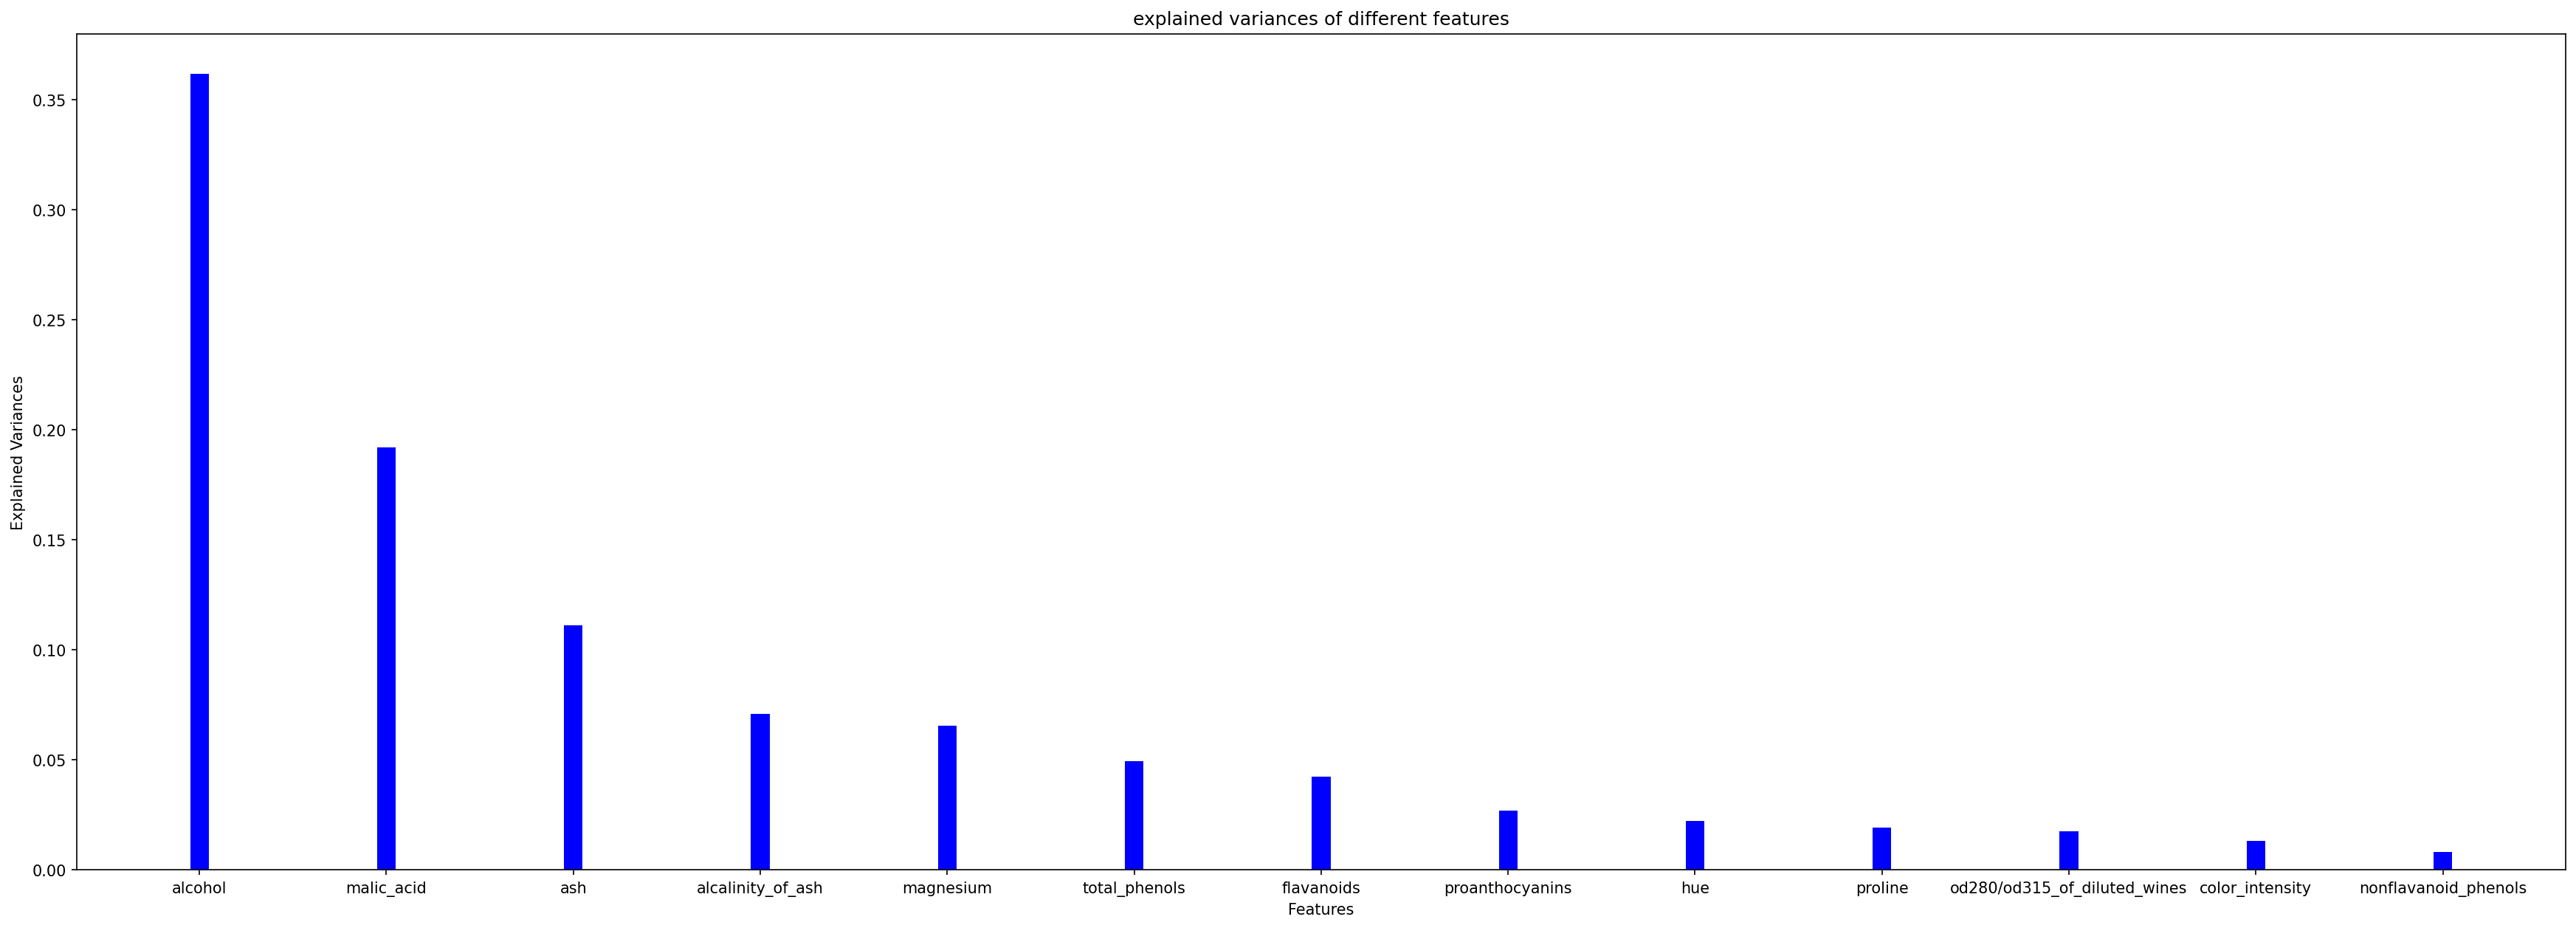

In [198]:
plt.figure(figsize=(29,10),dpi=150)
plt.bar(x,y,color='blue',width=0.1)
plt.xlabel('Features')
plt.ylabel('Explained Variances')
plt.title('explained variances of different features')
plt.show()